<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/Alexnet_CFIR100_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ACTIVITY 1 - Alexnet Implementation on CIFAR100 Dataset***

## **1. Importing libraries**

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

## **2. Alexnet Model Creation**

In [44]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
x1w = AlexNet.get_weights()[0][:,:,0,:]

#To print the kernel coefficients
for i in range(0,96):
      print("\nFilter "+str(i+1)+"\n")
      print(x1w[:,:,i])

AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(100))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Roll No: 20MAI0026
*****************************



Filter 1

[[ 9.38e-03 -1.97e-02 -1.46e-02  3.55e-03  1.61e-02  3.47e-03 -2.19e-02
   1.41e-02  1.67e-02 -7.32e-03 -1.61e-02]
 [-2.17e-02  1.40e-02  1.78e-02  1.04e-02  2.14e-02 -1.54e-02 -7.72e-03
  -3.29e-03 -2.11e-02  4.12e-03 -2.18e-03]
 [ 4.03e-03 -5.42e-03 -5.91e-03  2.22e-02  4.27e-05 -2.10e-02  2.11e-02
   5.73e-03 -2.20e-02 -1.30e-02 -1.09e-02]
 [ 1.32e-03  1.27e-02 -1.21e-02  9.63e-03 -1.49e-02  2.14e-02 -5.04e-03
  -2.14e-02 -1.21e-02 -1.65e-02  5.91e-03]
 [ 2.04e-02 -5.06e-04 -3.55e-04 -1.52e-02 -8.25e-03  1.23e-02 -2.19e-02
  -2.20e-02 -1.88e-02  1.46e-02 -2.21e-02]
 [-3.81e-03 -1.44e-02  1.78e-03 -1.02e-03 -6.29e-03 -1.73e-02  1.40e-02
   2.17e-02 -6.78e-03 -1.13e-02 -6.14e-03]
 [ 5.54e-03 -6.24e-03  1.35e-02 -2.07e-02  1.91e-02 -2.14e-02  1.97e-02
  -1.86e-02 -8.45e-03 -2.24e-02 -1.94e-02]
 [-1.77e-02  4.09e-04 -6.93e-05  2.23e-02 -3.96e-03 -1.12e-02 -3.25e-03
  -6.36e-03  2.20e-02 -1.93e-02  9.69e-04]
 [ 1.47e-02  1.25e

## **3. Compiling the model**

In [14]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

## **4. Loading the dataset**

In [23]:
from keras.datasets import cifar100

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data()



Roll No: 20MAI0026
*****************************




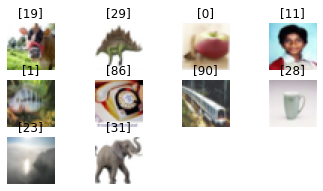

In [16]:
# Displays 10 sample input images

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(4,4,i+1)
# plot raw pixel data
  plt.imshow(X_train[i])
  plt.title(str(y_train[i]))
  plt.axis('off')

# show the figure

plt.show()

## **5. Train Test Split**

In [24]:
#Train-validation-test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

## **6. Feature Engineering**

In [25]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

X_train = X_train.reshape(X_train.shape[0], 32, 32,3)
X_test = X_test.reshape(X_test.shape[0], 32, 32,3)
X_val = X_val.reshape(X_val.shape[0], 32, 32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255
X_val /= 255


#Since we have 100 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 100
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


In [26]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
#Dataset details
print("Total number of images in database", X_train.shape[0]+X_val.shape[0]+X_test.shape[0])
print("Total number of images in training dataset", X_train.shape[0])
print("Total number of images in validation dataset", X_val.shape[0])
print("Total number of images in testing dataset", X_test.shape[0])
print("Size of image "+str(X_train.shape[1])+"*"+str(X_train.shape[2])+"*"+str(X_train.shape[3]))
print("Number of classes "+str(y_train.shape[1]))

Roll No: 20MAI0026
*****************************


Total number of images in database 60000
Total number of images in training dataset 45000
Total number of images in validation dataset 5000
Total number of images in testing dataset 10000
Size of image 32*32*3
Number of classes 100


In [27]:
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)


## **7. Training the model**

In [29]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [30]:
print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

#Defining the parameters
batch_size= 100
epochs=10
learn_rate=.001
#Training the model
AlexNet.fit_generator(train_generator.flow(X_train, y_train, batch_size=100), epochs = 10, steps_per_epoch = X_train.shape[0]//batch_size, validation_data = val_generator.flow(X_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

Roll No: 20MAI0026
*****************************


Epoch 1/10
  2/450 [..............................] - ETA: 23s - loss: 2.7650 - accuracy: 0.3050

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


450/450 [==============================] - 23s 50ms/step - loss: 2.8102 - accuracy: 0.2828 - val_loss: 5.8672 - val_accuracy: 0.0086
Epoch 2/10
450/450 [==============================] - 21s 47ms/step - loss: 2.7404 - accuracy: 0.2980
Epoch 3/10
450/450 [==============================] - 21s 46ms/step - loss: 2.6843 - accuracy: 0.3070
Epoch 4/10
450/450 [==============================] - 21s 46ms/step - loss: 2.6168 - accuracy: 0.3228
Epoch 5/10
450/450 [==============================] - 21s 47ms/step - loss: 2.5473 - accuracy: 0.3380
Epoch 6/10
450/450 [==============================] - 21s 47ms/step - loss: 2.4869 - accuracy: 0.3490
Epoch 7/10
450/450 [==============================] - 21s 46ms/step - loss: 2.4222 - accuracy: 0.3628
Epoch 8/10
450/450 [==============================] - 21s 46ms/step - loss: 2.3689 - accuracy: 0.3747
Epoch 9/10
450/450 [==============================] - 21s 46ms/step - loss: 2.3158 - accuracy: 0.3850
Epoch 10/10
450/450 [==============================

## **8. Testing the model**

In [31]:
#Making prediction
y_pred=AlexNet.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Roll No: 20MAI0026
*****************************




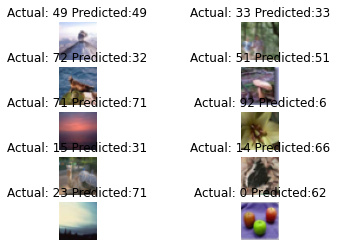

In [32]:
#Display few test images and predictions

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

for i in range(10):
# define subplot
  plt.subplot(5,2,i+1)
# plot raw pixel data
  plt.imshow(X_test[i])
  plt.title("Actual: "+ str(y_true[i])+" Predicted:" + str(y_pred[i]))
  plt.axis('off')

# show the figure

plt.show()

## ***9. Evaluation Metrics***

### ***Confusion Matrix***

In [38]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")
confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

Roll No: 20MAI0026
*****************************


[[20  2  2 ...  0  4  0]
 [ 0 32  0 ...  2  1  1]
 [ 0  0 27 ...  9 14  1]
 ...
 [ 0  0  0 ... 49  0  1]
 [ 0  0 10 ...  3 18  1]
 [ 0  0  2 ...  3  0 13]]


### ***Classification report***

In [39]:
# Calculate Precision and Recall for each class

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

report = classification_report(y_true, y_pred)
print(report)

Roll No: 20MAI0026
*****************************


              precision    recall  f1-score   support

           0       0.87      0.20      0.33       100
           1       0.44      0.32      0.37       100
           2       0.16      0.27      0.20       100
           3       0.10      0.04      0.06       100
           4       0.18      0.14      0.16       100
           5       0.48      0.10      0.17       100
           6       0.25      0.33      0.28       100
           7       0.47      0.17      0.25       100
           8       0.26      0.35      0.30       100
           9       0.70      0.23      0.35       100
          10       0.33      0.03      0.06       100
          11       0.10      0.17      0.13       100
          12       0.24      0.43      0.31       100
          13       0.26      0.37      0.31       100
          14       0.21      0.21      0.21       100
          15       0.18      0.14      0.16       100
          16       0.36      0

### ***Accuracy***

In [40]:
#Classification accuracy
from sklearn.metrics import accuracy_score

print("Roll No: 20MAI0026")
print("*****************************")
print("\n")

acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Roll No: 20MAI0026
*****************************


Accuracy Score =  0.2879
